# Solvers ⚙️

In this exercise, you will investigate the effects of different `solvers` on `LogisticRegression` models.

👇 Run the code below to import the dataset

In [160]:
import pandas as pd
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

import numpy as np
import seaborn as sns

In [161]:
df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers_dataset.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,6
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,7
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,4
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,8
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,3


- The dataset consists of different wines 🍷
- The features describe different properties of the wines 
- The target 🎯 is a quality rating given by an expert

## 1. Target engineering

In this section, you are going to transform the ratings into a binary target.

👇 How many observations are there for each rating?

In [162]:
df["quality rating"].value_counts()

10    10143
5     10124
1     10090
2     10030
8      9977
6      9961
9      9955
7      9954
4      9928
3      9838
Name: quality rating, dtype: int64

❓ Create `y` by transforming the target into a binary classification task where quality ratings below 6 are bad [0], and ratings of 6 and above are good [1]

In [163]:
y_binary = np.where(df["quality rating"] < 6, 0, 1)
y_binary

array([1, 1, 0, ..., 0, 1, 0])

❓ Check the class balance of the new binary target

(array([0, 1]), array([50010, 49990]))


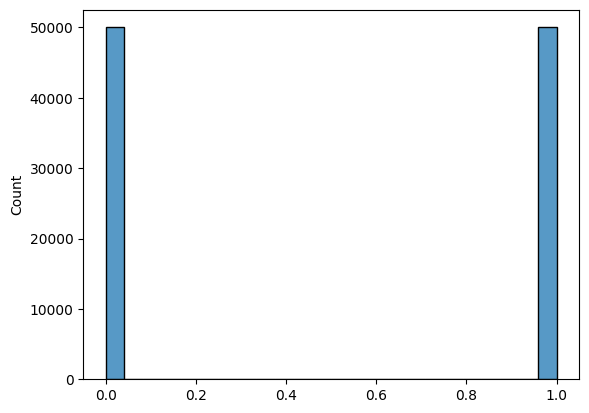

In [164]:
print(np.unique(y_binary, return_counts=True))
sns.histplot(y_binary);

❓ Create your `X` by normalising the features. This will allow for fair comparison of different solvers.

In [165]:
X = df.drop("quality rating", axis=1)

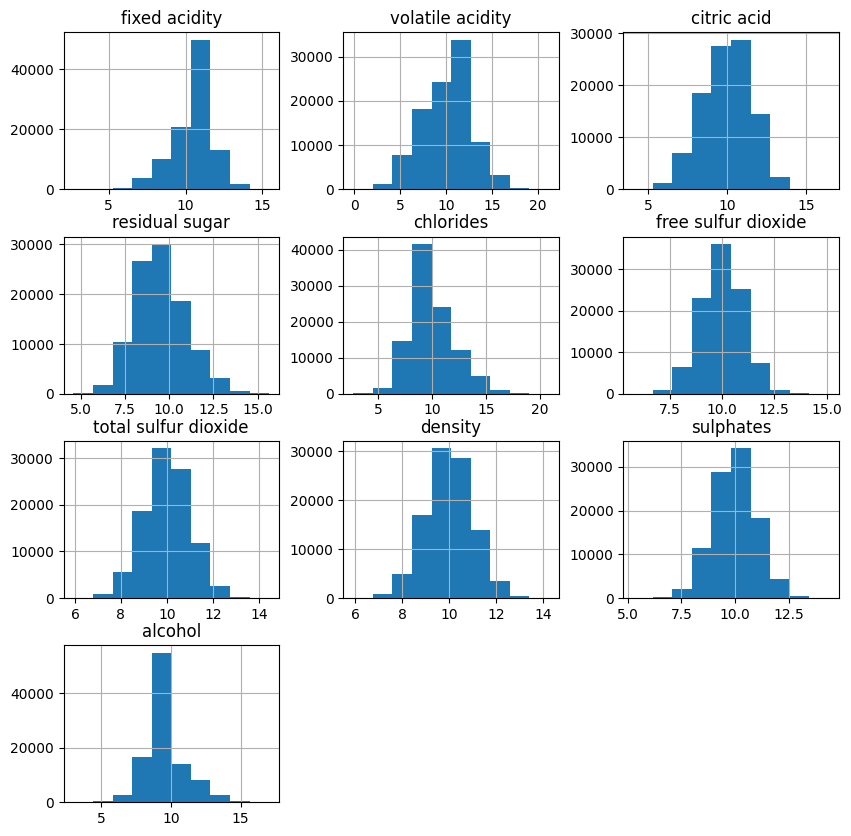

In [166]:
X.hist(figsize=[10,10]);

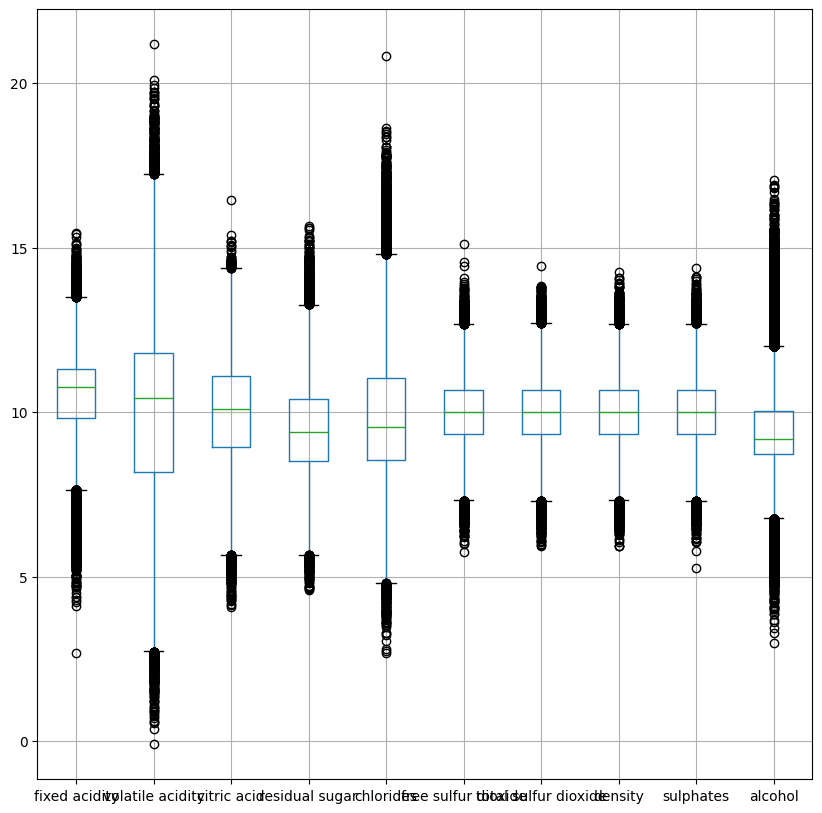

In [167]:
X.boxplot(figsize=[10,10]);

In [168]:
robust_scaler = RobustScaler().set_output(transform="pandas")
robust_scaler.fit(X)
X_scaled = robust_scaler.transform(X)
X_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,-0.884354,-1.231405,-1.252294,0.410526,-1.088,-0.634328,-0.162963,-0.358209,0.251852,-0.282443
1,-0.489796,-0.440771,-0.151376,-0.531579,0.236,-2.305970,-0.222222,-0.738806,-0.570370,-0.282443
2,-0.122449,0.074380,0.344037,0.831579,-0.212,0.313433,1.081481,0.932836,0.992593,-0.083969
3,0.156463,-0.550964,-0.811927,0.136842,-0.676,0.686567,-2.244444,0.798507,0.488889,-0.213740
4,0.918367,0.826446,0.119266,0.294737,0.612,-0.462687,0.162963,-0.716418,-1.718519,1.687023
...,...,...,...,...,...,...,...,...,...,...
99995,-2.612245,-1.639118,-0.844037,-0.415789,-0.060,0.798507,-1.200000,0.664179,1.792593,-0.137405
99996,-0.136054,-0.242424,-0.119266,-0.215789,0.084,0.029851,0.644444,0.955224,-0.318519,-0.152672
99997,-0.367347,0.148760,0.756881,1.247368,-0.276,-0.723881,-0.051852,-0.104478,0.029630,-0.389313
99998,-2.394558,-1.787879,-1.403670,-0.257895,-0.428,-0.186567,1.074074,0.156716,-1.244444,0.206107


## 2. LogisticRegression solvers

❓ Logistic Regression models can be optimized using different **solvers**. Make a comparison of the available solvers':
- Fit time - which solver is **the fastest**?
- Precision - **how different** are their respective precision scores?

Available solvers for Logistic Regression are `['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`
 
For more information on these 5 solvers, check out [this Stack Overflow thread](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [169]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    logistic_regression = LogisticRegression(solver=solver)
    logistic_regression.fit(X_scaled, y_binary)
    cv_results = cross_validate(estimator=logistic_regression, X=X_scaled, y=y_binary, scoring=["average_precision"])
    print(solver)
    #display(pd.DataFrame(cv_results))
    print("Average fit time:", cv_results["fit_time"].mean())
    print("Average average-precision:", cv_results["test_average_precision"].mean())
    print("\n")


newton-cg
Average fit time: 0.25275158882141113
Average average-precision: 0.9384138700187933


lbfgs
Average fit time: 0.08503308296203613
Average average-precision: 0.9384164002870532


liblinear
Average fit time: 0.27640523910522463
Average average-precision: 0.9384133924706195


sag
Average fit time: 1.3362435340881347
Average average-precision: 0.9384132903621986




/home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


saga
Average fit time: 2.272268867492676
Average average-precision: 0.9384136995822863




In [170]:
# YOUR ANSWER
fastest_solver = "lbfgs"

<details>
    <summary>ℹ️ Click here for our interpretation</summary>

All solvers should produce similar precision scores because our cost-function is "easy" enough to have a global minimum which is found by all 5 solvers. For very complex cost-functions such as in Deep Learning, different solvers may stopping at different values of the loss function.

**The wine dataset**
    
If you check feature importance with sklearn's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html">permutation_importance</a> on the current dataset, you'll see many features result in almost 0 importance. Liblinear solver successively moves only along *one* direction at a time, regularizing the others with L1 regularization (a.k.a, setting their beta to 0), which might provide a good fit for a dataset where many features are not that important in predicting the target.

❗️There is a cost to searching for the best solver. Sticking with the default (`lbfgs`) may save the most time overall, sklearn provides you this grid for an idea of which solver to choose to start off with: 

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers-chart.png" width=700>



</details> 

###  🧪 Test your code

In [171]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'solvers',
    fastest_solver=fastest_solver
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/04-Under-the-hood/data-solvers/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_solvers.py::TestSolvers::test_fastest_solver PASSED                 [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/solvers.pickle

git commit -m 'Completed solvers step'

git push origin master



## 3. Stochastic Gradient Descent

Logistic Regression models can also be optimized via Stochastic Gradient Descent.

❓ Evaluate a Logistic Regression model optimized via **Stochastic Gradient Descent**. How do its precision score and training time compare to the performance of the models trained in section 2?


<details>
<summary>💡 Hint</summary>

- If you are stuck, look at the [SGDClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)!

</details>



In [172]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_scaled, y_binary)
cv_results = cross_validate(estimator=sgd_classifier, X=X_scaled, y=y_binary, scoring=["average_precision"])
#display(pd.DataFrame(cv_results))
print("Average fit time:", cv_results["fit_time"].mean())
print("Average average-precision:", cv_results["test_average_precision"].mean())
print("\n")


Average fit time: 0.23861660957336425
Average average-precision: 0.9374890835826498




☝️ The SGD model should have one of the shortest times (maybe even shorter than `liblinear`), for similar performance. This is a direct effect of performing each epoch of the Gradient Descent on a single row as opposed to loading 100k rows into memory at a time.

## 4. Predictions

❓ Use the best model (balanced with short fit time and high precision) to predict the binary quality (0 or 1) of the following wine. Store your:
- `predicted_class`
- `predicted_proba_of_class` (i.e if your model predicted a class of 1 what is the probability it believes 1 to be the class should be between 0 and 1)

In [173]:
logreg_lbfgs = LogisticRegression(solver="lbfgs")
logreg_lbfgs.fit(X_scaled, y_binary)

LogisticRegression()

In [174]:
new_wine = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers_new_wine.csv')
new_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,9.54,13.5,12.35,8.78,14.72,9.06,9.67,10.15,11.17,12.17


In [175]:
new_wine_scaled = robust_scaler.transform(new_wine)
new_wine_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,-0.836735,0.842975,1.036697,-0.321053,2.064,-0.701493,-0.244444,0.11194,0.866667,2.290076


In [176]:
predicted_class = logreg_lbfgs.predict(new_wine_scaled)[0]
predicted_proba_of_class = logreg_lbfgs.predict_proba(new_wine_scaled)[0][0]
print(predicted_class)
print(predicted_proba_of_class)

0
0.9686617716056194


# 🏁  Check your code and push your notebook

In [177]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'new_data_prediction',
    predicted_class=predicted_class,
    predicted_proba_of_class=predicted_proba_of_class
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/04-Under-the-hood/data-solvers/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_new_data_prediction.py::TestNewDataPrediction::test_predicted_class PASSED [ 50%]
test_new_data_prediction.py::TestNewDataPrediction::test_predicted_proba PASSED [100%]

============================== 2 passed in 0.21s ===============================


💯 You can commit your code:

git add tests/new_data_prediction.pickle

git commit -m 'Completed new_data_prediction step'

git push origin master

